# **k-Fold Cross Validation**

**Data Set Information:**

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family . Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

**Attribute Information:**

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## **Data Preprocessing**

### **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Loading the data set**

In [2]:
df = pd.read_csv('../input/uci-mushroom-dataset/Mushroom data.csv')
df.head()

,Mushroom_quality,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df =df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'Mushroom_quality']]
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalkshape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Mushroom_quality
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap_shape                 8124 non-null   object
 1   cap_surface               8124 non-null   object
 2   cap_color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill_attachment           8124 non-null   object
 6   gill_spacing              8124 non-null   object
 7   gill_size                 8124 non-null   object
 8   gill_color                8124 non-null   object
 9   stalkshape                8124 non-null   object
 10  stalk_root                8124 non-null   object
 11  stalk_surface_above_ring  8124 non-null   object
 12  stalk_surface_below_ring  8124 non-null   object
 13  stalk_color_above_ring    8124 non-null   object
 14  stalk_color_below_ring  

In [6]:
df.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalkshape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Mushroom_quality
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [7]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalkshape                  0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
Mushroom_quality            0
dtype: int64

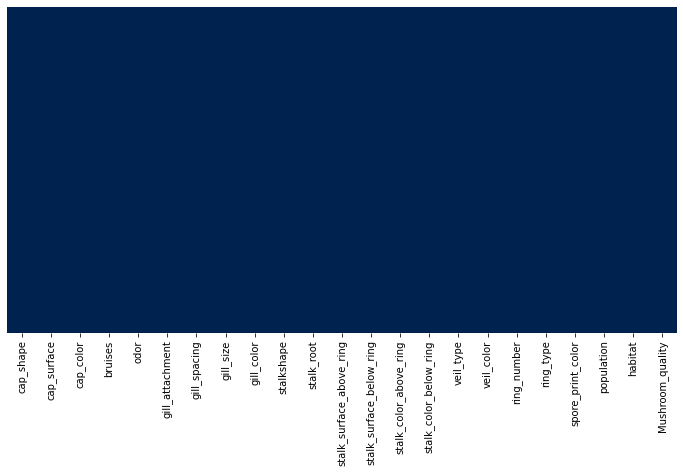

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'cividis');

In [9]:
df.nunique()

cap_shape                    6
cap_surface                  4
cap_color                   10
bruises                      2
odor                         9
gill_attachment              2
gill_spacing                 2
gill_size                    2
gill_color                  12
stalkshape                   2
stalk_root                   5
stalk_surface_above_ring     4
stalk_surface_below_ring     4
stalk_color_above_ring       9
stalk_color_below_ring       9
veil_type                    1
veil_color                   4
ring_number                  3
ring_type                    5
spore_print_color            9
population                   6
habitat                      7
Mushroom_quality             2
dtype: int64

In [10]:
cap_shape = pd.get_dummies(df['cap_shape'],drop_first=True)
cap_surface = pd.get_dummies(df['cap_surface'],drop_first=True)
cap_color = pd.get_dummies(df['cap_color'],drop_first=True)
odor = pd.get_dummies(df['odor'],drop_first=True)
gill_color = pd.get_dummies(df['gill_color'],drop_first=True)
stalk_root = pd.get_dummies(df['stalk_root'],drop_first=True)
stalk_surface_above_ring = pd.get_dummies(df['stalk_surface_above_ring'],drop_first=True)
stalk_surface_below_ring = pd.get_dummies(df['stalk_surface_below_ring'],drop_first=True)
stalk_color_above_ring = pd.get_dummies(df['stalk_color_above_ring'],drop_first=True)
stalk_color_below_ring = pd.get_dummies(df['stalk_color_below_ring'],drop_first=True)
veil_color = pd.get_dummies(df['veil_color'],drop_first=True)
ring_number = pd.get_dummies(df['ring_number'],drop_first=True)
ring_type = pd.get_dummies(df['ring_type'],drop_first=True)
spore_print_color = pd.get_dummies(df['spore_print_color'],drop_first=True)
population = pd.get_dummies(df['population'],drop_first=True)
habitat = pd.get_dummies(df['habitat'],drop_first=True)

df = pd.concat([df,cap_shape, cap_surface, cap_color, 
                odor, gill_color, stalk_root, stalk_surface_above_ring, 
                stalk_surface_below_ring, stalk_color_above_ring, 
                stalk_color_below_ring, veil_color, ring_number, 
                ring_type, spore_print_color, population, habitat],axis=1)
df.drop(['cap_shape', 'cap_surface','cap_color', 
         'odor', 'gill_color','stalk_root', 'stalk_surface_above_ring', 
         'stalk_surface_below_ring', 'stalk_color_above_ring', 
         'stalk_color_below_ring','veil_color','ring_number', 
         'ring_type', 'spore_print_color', 'population', 'habitat'],axis=1,inplace=True)
df.head()


,bruises,gill_attachment,gill_spacing,gill_size,stalkshape,veil_type,Mushroom_quality,c,f,k,...,n,s,v,y,g,l,m,p,u,w
0,t,f,c,n,e,p,p,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,t,f,c,b,e,p,e,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,t,f,c,b,e,p,e,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,t,f,c,n,e,p,p,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,f,f,w,b,t,p,e,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gill_attachment'] = le.fit_transform(df['gill_attachment'])

df['gill_spacing'] = df['gill_spacing']['c']= 1
df['gill_spacing'] = df['gill_spacing']['w']= 0

df['gill_size'] = df['gill_size'].replace({'b' : 1, 'n' : 0})

df['stalkshape'] = df['stalkshape'].map({'e': 1, 't': 0})
df["veil_type"] = df["veil_type"].apply({'u':1, 'p':0}.get)
df['bruises'] = df['bruises'].replace({'t' : 1, 'f' : 0})
df['Mushroom_quality'] = df['Mushroom_quality'].apply(lambda x: 1 if x == 'e' else 0)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 97 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   bruises           8124 non-null   int64
 1   gill_attachment   8124 non-null   int64
 2   gill_spacing      8124 non-null   int64
 3   gill_size         8124 non-null   int64
 4   stalkshape        8124 non-null   int64
 5   veil_type         8124 non-null   int64
 6   Mushroom_quality  8124 non-null   int64
 7   c                 8124 non-null   uint8
 8   f                 8124 non-null   uint8
 9   k                 8124 non-null   uint8
 10  s                 8124 non-null   uint8
 11  x                 8124 non-null   uint8
 12  g                 8124 non-null   uint8
 13  s                 8124 non-null   uint8
 14  y                 8124 non-null   uint8
 15  c                 8124 non-null   uint8
 16  e                 8124 non-null   uint8
 17  g                 8124 non-null  

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Training the Classification models on the Train set
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

#Predicting the Test set results
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of  Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for  Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

Accuracy of Logistic Regression Model is  1.0

 Confusion Matrix of Logistic Regression Model:
 [[1992    0]
 [   0   39]]

 
 Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      1.00      1.00        39

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


 
 Accuracy of K-Nearest Neighbor Model is  1.0

 Confusion Matrix of K-Nearest Neighbor Model:
 [[1992    0]
 [   0   39]]

 
 Classification Report for K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      1.00      1.00        39

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score


accuracies_LR = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print("Accuracy  of Logistic Regression Model: {:.2f} %".format(accuracies_LR.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_LR.std()*100))

accuracies_KNN = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print("Accuracy  of K-Nearest Neighbor Model: {:.2f} %".format(accuracies_KNN.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_KNN.std()*100))

accuracies_SV = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print("Accuracy  of Support Vector Model: {:.2f} %".format(accuracies_SV.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_SV.std()*100))

accuracies_NB = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print("Accuracy  of Naive Bayes Model: {:.2f} %".format(accuracies_NB.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_NB.std()*100))

accuracies_DTC = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print("Accuracy  of Decision Tree Model: {:.2f} %".format(accuracies_DTC.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_DTC.std()*100))

accuracies_RF = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print("Accuracy  of Random Forest Model: {:.2f} %".format(accuracies_RF.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_RF.std()*100))


Accuracy  of Logistic Regression Model: 100.00 %
Standard Deviation: 0.00 %
Accuracy  of K-Nearest Neighbor Model: 99.98 %
Standard Deviation: 0.05 %
Accuracy  of Support Vector Model: 97.49 %
Standard Deviation: 0.07 %
Accuracy  of Naive Bayes Model: 100.00 %
Standard Deviation: 0.00 %
Accuracy  of Decision Tree Model: 100.00 %
Standard Deviation: 0.00 %
Accuracy  of Random Forest Model: 100.00 %
Standard Deviation: 0.00 %
